In [1]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#importing dataset
data = pd.read_csv("Comcast_telecom_complaints_data.csv")


In [3]:
#creating  a column to indicate timestamp
data["Timestamp"] = data["Date_month_year"] + " " + data["Time"]
data["Timestamp"] = pd.to_datetime(data["Timestamp"])
data["Date_month_year"] = pd.to_datetime(data["Date_month_year"])


In [4]:
print(data.dtypes)

Ticket #                               object
Customer Complaint                     object
Date                                   object
Date_month_year                datetime64[ns]
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
Timestamp                      datetime64[ns]
dtype: object


In [5]:
data = data.set_index(data["Timestamp"])

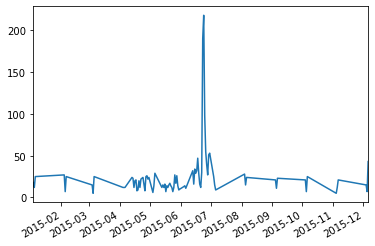

In [6]:
data["Date_month_year"].value_counts().plot()


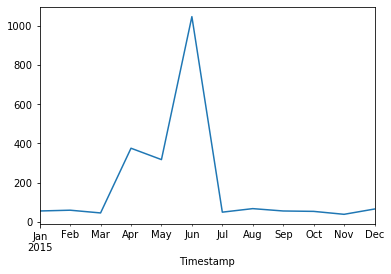

In [7]:
#Getting complaints by month(Monthly Granularity)
data.groupby(pd.Grouper(freq="M")).size().plot()


In [8]:
#Getting distinct values for 'Status' column
print(data.Status.unique())


['Closed' 'Open' 'Solved' 'Pending']


In [9]:
# Creating a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

data["newStatus"] = ["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in data["Status"]]

In [10]:
#Verify the unique column names in 'Status' column
print(data.newStatus.unique())


['Closed' 'Open']


In [11]:
#Providing state wise status of complaints in a stacked bar chart
Status_complaints = data.groupby(["State","newStatus"]).size().unstack().fillna(0)
Status_complaints

newStatus,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


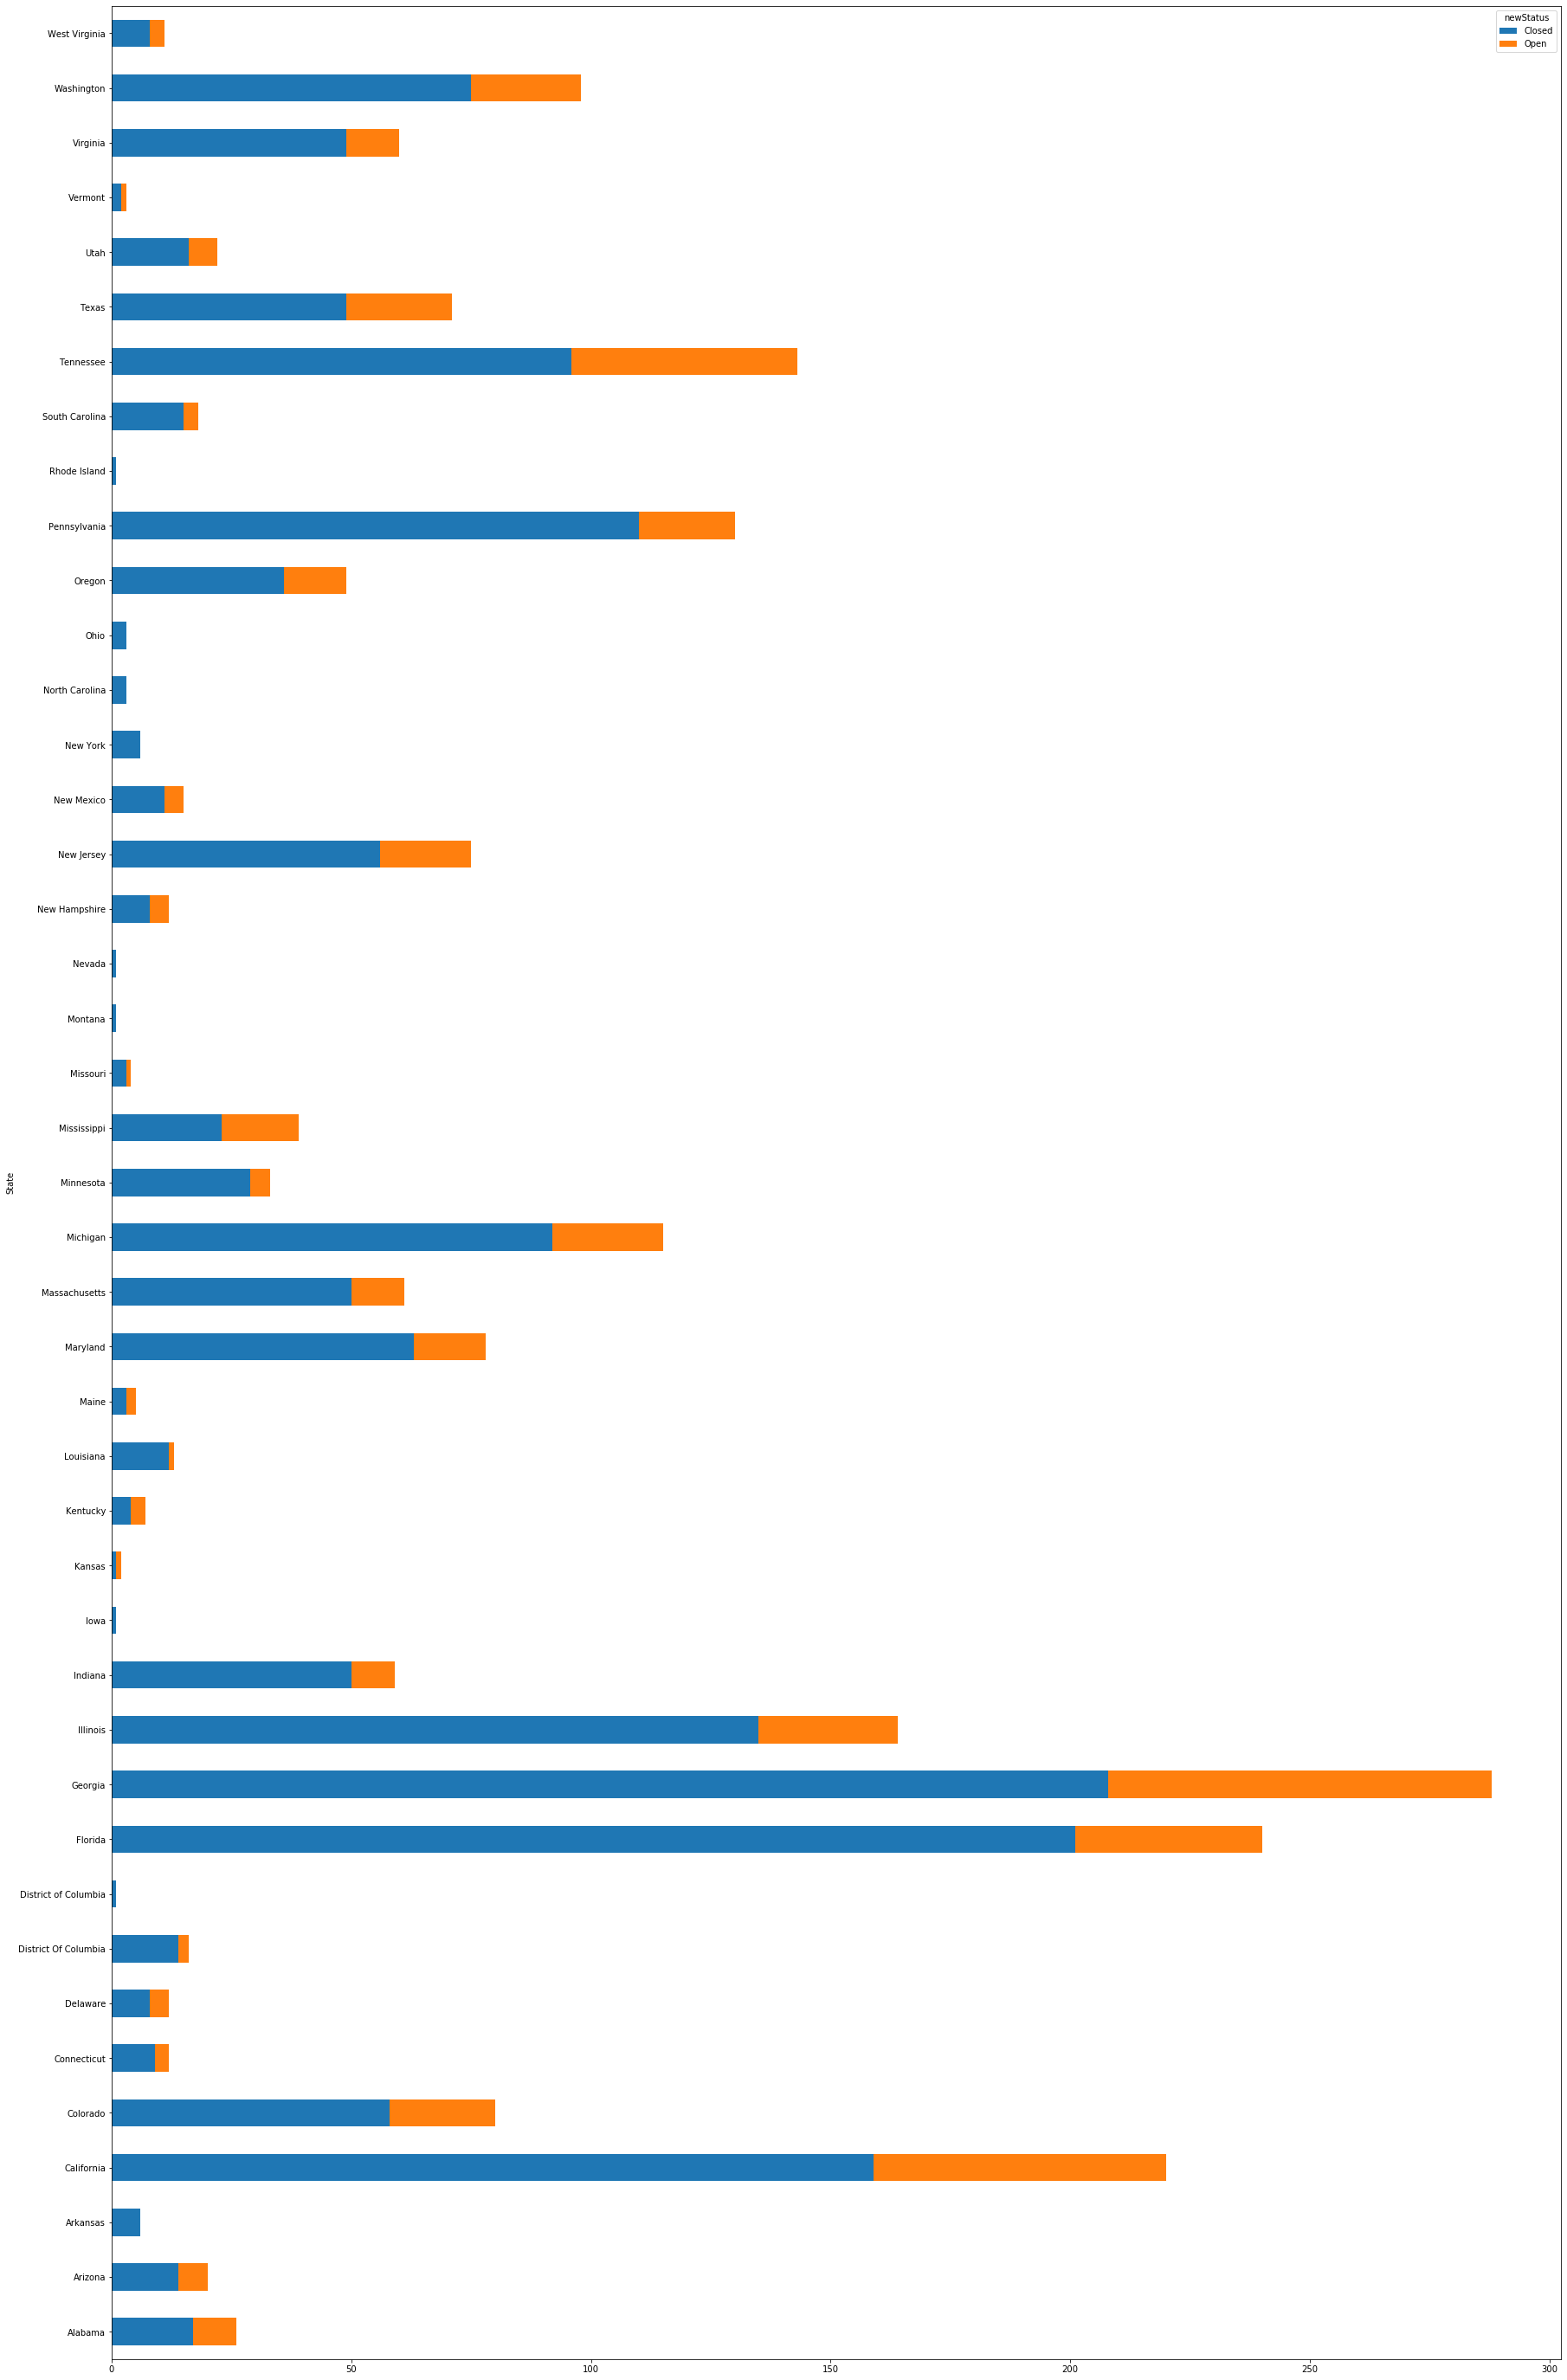

In [12]:
Status_complaints.plot(kind="barh", figsize=(30,50), stacked=True)

In [13]:
#10 States with maximum complaints
data.groupby(["State"]).size().sort_values(ascending=False).to_frame().reset_index().rename({0: "Count"}, axis=1)[:10]

,State,Count
0,Georgia,288
1,Florida,240
2,California,220
3,Illinois,164
4,Tennessee,143
5,Pennsylvania,130
6,Michigan,115
7,Washington,98
8,Colorado,80
9,Maryland,78


In [14]:
#State with max complaints
data.groupby(["State"]).size().sort_values(ascending=False).to_frame().reset_index().rename({0: "Count"}, axis=1)[:1]

,State,Count
0,Georgia,288


In [15]:
#Percentage of unresolved complaints
Status_complaints['Percentage_of_unresolved_complaints']=(Status_complaints['Open']/Status_complaints['Open'].sum())*100
Status_complaints

newStatus,Closed,Open,Percentage_of_unresolved_complaints
State,,,
Alabama,17.0,9.0,1.740812
Arizona,14.0,6.0,1.160542
Arkansas,6.0,0.0,0.000000
California,159.0,61.0,11.798839
Colorado,58.0,22.0,4.255319
Connecticut,9.0,3.0,0.580271
Delaware,8.0,4.0,0.773694
District Of Columbia,14.0,2.0,0.386847
District of Columbia,1.0,0.0,0.000000


In [16]:

#State with the highest percentage of unresolved complaints

print(Status_complaints[Status_complaints['Percentage_of_unresolved_complaints']==Status_complaints['Percentage_of_unresolved_complaints'].max()])

newStatus  Closed  Open  Percentage_of_unresolved_complaints
State                                                       
Georgia     208.0  80.0                            15.473888


In [17]:
!pip install wordcloud
!pip install nltk

     |████████████████████████████████| 364 kB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.4 MB 3.1 MB/s eta 0:00:01
     |████████████████████████████████| 660 kB 19.0 MB/s eta 0:00:01
     |████████████████████████████████| 67 kB 5.9 MB/s  eta 0:00:01
  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434674 sha256=033433cc7dddd9c5f748dfbe3eebdb015614a6e45f8ea6d0e467acaa85ac70e0
  Stored in directory: /home/jovyan/.cache/pip/wheels/45/6c/46/a1865e7ba706b3817f5d1b2ff7ce8996aabdd0d03d47ba0266
Successfully built nltk


In [18]:

from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import nltk
nltk.download('stopwords')
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [19]:
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = "".join([ch for ch in stop_free if ch not in exclude])
    normalised = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalised

In [20]:
nltk.download('wordnet')
doc_complete = data["Customer Complaint"].tolist()
doc_clean = [clean(doc).split() for doc in doc_complete]

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [21]:
!pip install gensim

     |████████████████████████████████| 24.2 MB 355 kB/s eta 0:00:01     |████████████████████████▊       | 18.7 MB 3.0 MB/s eta 0:00:02
     |████████████████████████████████| 116 kB 46.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.4 MB 18.8 MB/s eta 0:00:01
     |████████████████████████████████| 129 kB 43.4 MB/s eta 0:00:01
     |████████████████████████████████| 69 kB 9.7 MB/s  eta 0:00:01
     |████████████████████████████████| 6.5 MB 39.7 MB/s eta 0:00:01
     |████████████████████████████████| 547 kB 16.3 MB/s eta 0:00:01
  Created wheel for smart-open: filename=smart_open-2.1.0-py3-none-any.whl size=110317 sha256=3b76468336c75f11ccdbc7356512d9038cedda8ee31fe54279a23e5390984ff8
  Stored in directory: /home/jovyan/.cache/pip/wheels/56/b5/6d/86dbe4f29d4688e5163a8b8c6b740494310040286fca4dc648
Successfully built smart-open


In [22]:
import gensim
from gensim import corpora

In [23]:
dictionary = corpora.Dictionary(doc_clean)
print(dictionary)

Dictionary(1412 unique tokens: ['cable', 'comcast', 'internet', 'speed', 'disappear']...)


In [24]:

doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
doc_term_matrix

[[(0, 1), (1, 1), (2, 1), (3, 1)],
 [(4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(3, 1), (8, 1)],
 [(1, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)],
 [(1, 1), (8, 1), (16, 1), (17, 1)],
 [(18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)],
 [(8, 1), (10, 1), (20, 1), (25, 1), (26, 1)],
 [(1, 1), (8, 1), (27, 1), (28, 1), (29, 1), (30, 1)],
 [(1, 1), (31, 1), (32, 1)],
 [(1, 1), (33, 1), (34, 1), (35, 1), (36, 1)],
 [(5, 1), (8, 1), (37, 1), (38, 1)],
 [(39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1)],
 [(1, 1),
  (2, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1)],
 [(2, 1), (3, 1)],
 [(2, 1), (54, 1), (55, 1), (56, 1)],
 [(2, 1), (57, 1)],
 [(2, 1), (3, 1), (58, 1)],
 [(1, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1)],
 [(2, 1), (8, 1), (66, 1)],
 [(8, 1), (40, 1), (67, 1), (68, 1), (69, 1)],
 [(2, 1), (70, 1), (71, 1)],
 [(0, 1), (8, 2), (66, 1), (72, 1)],
 [(3, 1)],
 [(1

In [25]:
from gensim.models import LdaModel


In [26]:
Num_Topic = 9
ldamodel = LdaModel(doc_term_matrix, num_topics= Num_Topic, id2word= dictionary, passes= 30)

In [27]:
topics = ldamodel.show_topics()
for topic in topics:
    print(topic)
    print()

(0, '0.135*"internet" + 0.124*"speed" + 0.066*"comcast" + 0.065*"service" + 0.046*"throttling" + 0.037*"cable" + 0.037*"poor" + 0.036*"xfinity" + 0.019*"help" + 0.018*"high"')

(1, '0.114*"internet" + 0.086*"slow" + 0.055*"comcast" + 0.050*"speed" + 0.030*"connectivity" + 0.029*"account" + 0.026*"charge" + 0.019*"charged" + 0.018*"unauthorized" + 0.014*"extremely"')

(2, '0.039*"comcast" + 0.037*"month" + 0.036*"pay" + 0.030*"2" + 0.029*"back" + 0.026*"bill" + 0.025*"equipment" + 0.019*"call" + 0.014*"scam" + 0.014*"10"')

(3, '0.168*"internet" + 0.136*"service" + 0.124*"comcast" + 0.020*"bill" + 0.019*"problem" + 0.019*"day" + 0.010*"misleading" + 0.010*"broadband" + 0.009*"without" + 0.009*"signal"')

(4, '0.066*"comcast" + 0.036*"refund" + 0.035*"connection" + 0.029*"charging" + 0.025*"intermittent" + 0.025*"paying" + 0.022*"unreliable" + 0.021*"low" + 0.021*"several" + 0.019*"monopoly"')

(5, '0.108*"comcast" + 0.101*"service" + 0.018*"contract" + 0.017*"monthly" + 0.016*"bill" + 0

In [28]:

word_dict = {}
for i in range(Num_Topic):
    words = ldamodel.show_topic(i, topn =20)
    word_dict["Topic # " + "{}".format(i)] = [i[0] for i in words]

In [29]:
pd.DataFrame(word_dict)


,Topic # 0,Topic # 1,Topic # 2,Topic # 3,Topic # 4,Topic # 5,Topic # 6,Topic # 7,Topic # 8
0,internet,internet,comcast,internet,comcast,comcast,comcast,comcast,billing
1,speed,slow,month,service,refund,service,data,internet,comcast
2,comcast,comcast,pay,comcast,connection,contract,cap,charge,complaint
3,service,speed,2,bill,charging,monthly,unfair,false,service
4,throttling,connectivity,back,problem,intermittent,bill,usage,business,issue
5,cable,account,bill,day,paying,access,pricing,outage,practice
6,poor,charge,equipment,misleading,unreliable,show,fee,deceptive,price
7,xfinity,charged,call,broadband,low,year,xfinity,switch,customer
8,help,unauthorized,scam,without,several,charged,limit,home,comcastxfinity
9,high,extremely,10,signal,monopoly,fee,charge,cramming,monopolistic
